In [1]:
from PIL import ImageOps, Image
import numpy as np
import os
from PIL import ImageOps, Image
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def classify(image, model, class_names):

    ImageOps.fit(image, (224, 224), Image.Resampling.LANCZOS)

    image_array = np.array(image)

    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array

    prediction = model.predict(data)
    # index = np.argmax(prediction)
    index = 1 if prediction[0][1] > 0.95 else 0
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    return class_name, confidence_score

In [3]:
def load_images_from_directory(directory, class_name):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = Image.open(img_path).convert('RGB')
        img = img.resize((224, 224))
        images.append(img)
        labels.append(class_name)
    return images, labels

In [4]:
# Load your Teachable Machine model
model = tf.keras.models.load_model('classification model/model13_05.h5')
class_names = ['NORMAL', 'PNEUMONIA']  # Match your model's output

# Data loading and prediction
val_pneumonia_images, pneumonia_labels = load_images_from_directory("chest_xray/val/PNEUMONIA", 'PNEUMONIA')
val_normal_images, normal_labels = load_images_from_directory("chest_xray/val/NORMAL", 'NORMAL')

val_images = val_pneumonia_images + val_normal_images
val_labels = pneumonia_labels + normal_labels

y_true = []
y_pred = []

for i, image in enumerate(val_images):
    class_name, confidence_score = classify(image, model, class_names)
    y_true.append(val_labels[i])
    y_pred.append(class_name)

# Performance Evaluation
cm = confusion_matrix(y_true, y_pred, labels=class_names)
print("Confusion Matrix:\n", cm)
print(classification_report(y_true, y_pred))

1/1 [==============================] - 0s 15ms/step
Confusion Matrix:
 [[206  28]
 [ 46 344]]
              precision    recall  f1-score   support

      NORMAL       0.82      0.88      0.85       234
   PNEUMONIA       0.92      0.88      0.90       390

    accuracy                           0.88       624
   macro avg       0.87      0.88      0.88       624
weighted avg       0.88      0.88      0.88       624



In [5]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 2)                 128300    
                                                                 
Total params: 538508 (2.05 MB)
Trainable params: 524428 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [6]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.0/245.0 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 36.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 13.9 MB/s eta 0:00:00
You should consider upgrading via the '/Users/rajarshi/Documents/Projects/IUDX/pneumonia-classification-app/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


The 'loss' key is not present in the history object.


/var/folders/0t/hvsnd519105bm_jk460jjpl40000gn/T/ipykernel_18902/3022667521.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


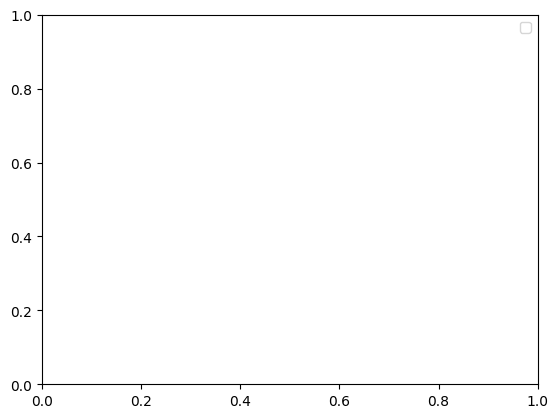

In [9]:
import matplotlib.pyplot as plt

# Get the training history
history = model.history

# Plot the graph
plt.plot(history.epoch, history.history['loss'], label='Loss')
plt.plot(history.epoch, history.history['accuracy'], label='Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training Progress')

# Add legend
plt.legend()

# Show the plot
plt.show()


# Plot the graph
plt.plot(epochs, loss, label='Loss')
plt.plot(epochs, accuracy, label='Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training Progress')

# Add legend
plt.legend()

# Show the plot
plt.show()
